As an avid golf fan and individual interested in data analytics, I am intrigued by the conversations made in the last 4 years regarding the distance debate and the need to cut back on distances gains. Given the golf ball roll-back announced during late 2023, I was intrigued to see what statistics would influence the performance of a golfer over the 2007-2017 seasons, a time where distance was not a controversial issue.

The purpose of this notebook is to illustrate the different metrics that influence whether a PGA tour player would be considered elite, which for my purposes will be defined as a player who had 5 or more top 10 finishes. The dataset contains pga tour player data from 2010-2017.

# Data Dictionary

**NAME** - Name of the golfer.

**ROUNDS** - Number of PGA tour rounds played in that year by that particular
player.

**SCORING** - Average score per round played for that year. According to the PGAtour.com website, this metric is an adjusted scoring average, which takes into account the strength of the field for each event.

**DRIVE_DISTANCE** - The average number of yards per measured drive. Drives are measured on two holes per round and holes are selected that face in opposite directions to counteract the effect of wind. Drives are measured to the point at which they come to rest regardless of whether they are in the fairway or not.

**FWY_%** - The percentage of time a tee shot comes to rest in the fairway (regardless of club).

**GIR_%** - The percent of time a player was able to hit the green in regulation. A green is considered hit in regulation if any portion of the ball is touching the putting surface after the GIR stroke has been taken. The GIR stroke is determined by subtractin 2 from par on a hole (1st stroke on a par 3, 2nd on a par 4, 3rd on a par 5).

**SG_P (Strokes gained putting)** - The number of putts a player takes from a specific distance is measures against a statistical baseline to determine the player's stroked gained or lost on a hole. The sum of the values for all holes played in a round minus the field average stroked gained/lost for the round is the player's strokes gained/lost for that round. The sum of strokes gained for each round are then divided by total rounds played.

**SG_TTG (Strokes gained tee to green)** - The per round average of the number of strokes the player was better or worse than the field average on the same course & event minus the player's strokes gained putting value.

**SG_T (Strokes Gained Total)** - The per round average of the number of strokes the player was better or worse than the field average on the same course & event.

**POINTS** - The cumulative points the player has earned in the FedEx Cup points race for the year played.

**TOP_10** - Number of top 10 finishes the player earned for the year played.

**1ST** - Number of wins the player earned for the year played.

**Year** - Year of PGA tour season

**MONEY** - PGA tour earnings from the season specified.

**COUNTRY** - Home country for player.

# Imports & Data Cleaning

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
from scipy import stats
import statsmodels.api as s
from scipy.stats import f_oneway
from google.colab import drive
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
golfdata = pd.read_csv("/content/drive/MyDrive/pgatour_cleaned.csv", encoding='latin-1')

In [156]:
golfdata = golfdata.drop(['Unnamed: 0'],axis = 1)
golfdata

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY
0,Aaron Baddeley,83,70.088,291.9,60.00,60.35,0.629,0.435,1.064,17703,7,1,2007,3441119,AUS
1,Adam Scott,69,70.008,300.9,59.17,65.44,0.129,1.105,1.234,15630,6,1,2007,3413185,AUS
2,Alex Cejka,80,70.437,288.9,68.08,69.44,-0.479,1.207,0.728,2400,4,0,2007,868303,GER
3,Anders Hansen,55,70.856,280.7,66.95,62.85,-0.176,0.087,-0.089,1989,0,0,2007,461216,DEN
4,Andrew Buckle,77,71.443,294.7,58.14,62.52,0.161,-0.426,-0.265,1875,1,0,2007,513630,AUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,Whee Kim,74,70.964,289.4,54.32,62.09,0.456,-0.688,-0.232,583,2,0,2017,1125368,KOR
2040,William McGirt,89,71.151,284.8,70.06,67.23,-0.018,-0.049,-0.067,621,3,0,2017,1225005,USA
2041,Xander Schauffele,96,70.163,306.3,57.68,67.74,0.342,0.382,0.724,2151,4,2,2017,4312674,USA
2042,Zac Blair,105,71.007,272.7,69.70,64.70,0.035,-0.078,-0.044,364,1,0,2017,788352,USA


In [157]:
#Creating a new column that classifies Elite Golfers with 5 or more top 10 finishes
golfdata['Elite'] = golfdata['TOP 10'] >= 5

golfdata

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY,Elite
0,Aaron Baddeley,83,70.088,291.9,60.00,60.35,0.629,0.435,1.064,17703,7,1,2007,3441119,AUS,True
1,Adam Scott,69,70.008,300.9,59.17,65.44,0.129,1.105,1.234,15630,6,1,2007,3413185,AUS,True
2,Alex Cejka,80,70.437,288.9,68.08,69.44,-0.479,1.207,0.728,2400,4,0,2007,868303,GER,False
3,Anders Hansen,55,70.856,280.7,66.95,62.85,-0.176,0.087,-0.089,1989,0,0,2007,461216,DEN,False
4,Andrew Buckle,77,71.443,294.7,58.14,62.52,0.161,-0.426,-0.265,1875,1,0,2007,513630,AUS,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,Whee Kim,74,70.964,289.4,54.32,62.09,0.456,-0.688,-0.232,583,2,0,2017,1125368,KOR,False
2040,William McGirt,89,71.151,284.8,70.06,67.23,-0.018,-0.049,-0.067,621,3,0,2017,1225005,USA,False
2041,Xander Schauffele,96,70.163,306.3,57.68,67.74,0.342,0.382,0.724,2151,4,2,2017,4312674,USA,False
2042,Zac Blair,105,71.007,272.7,69.70,64.70,0.035,-0.078,-0.044,364,1,0,2017,788352,USA,False


In [158]:
# Step 1: Calculate quartiles
quartiles = golfdata['DRIVE_DISTANCE'].quantile([0.25, 0.5, 0.75])

# Step 2: Function to assign quartile group labels
def assign_quartile_group(distance):
    if distance <= quartiles[0.25]:
        return 'Q1'
    elif distance <= quartiles[0.5]:
        return 'Q2'
    elif distance <= quartiles[0.75]:
        return 'Q3'
    else:
        return 'Q4'

# Step 3: Apply the function and create a new column
golfdata['Drive_Distance_Quartile'] = golfdata['DRIVE_DISTANCE'].apply(assign_quartile_group)

In [159]:
import pandas as pd
import statsmodels.api as sm

# Sample DataFrame
# Assuming df is the DataFrame from the previous example

# Step 1: Create dummy variables for quartile groups
quartile_dummies = pd.get_dummies(golfdata['Drive_Distance_Quartile'], prefix='Quartile')

# Concatenate the dummy variables with the original DataFrame
golfdata = pd.concat([golfdata, quartile_dummies], axis=1)

In [160]:
golfdata

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,...,1ST,Year,MONEY,COUNTRY,Elite,Drive_Distance_Quartile,Quartile_Q1,Quartile_Q2,Quartile_Q3,Quartile_Q4
0,Aaron Baddeley,83,70.088,291.9,60.00,60.35,0.629,0.435,1.064,17703,...,1,2007,3441119,AUS,True,Q3,0,0,1,0
1,Adam Scott,69,70.008,300.9,59.17,65.44,0.129,1.105,1.234,15630,...,1,2007,3413185,AUS,True,Q4,0,0,0,1
2,Alex Cejka,80,70.437,288.9,68.08,69.44,-0.479,1.207,0.728,2400,...,0,2007,868303,GER,False,Q2,0,1,0,0
3,Anders Hansen,55,70.856,280.7,66.95,62.85,-0.176,0.087,-0.089,1989,...,0,2007,461216,DEN,False,Q1,1,0,0,0
4,Andrew Buckle,77,71.443,294.7,58.14,62.52,0.161,-0.426,-0.265,1875,...,0,2007,513630,AUS,False,Q3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,Whee Kim,74,70.964,289.4,54.32,62.09,0.456,-0.688,-0.232,583,...,0,2017,1125368,KOR,False,Q3,0,0,1,0
2040,William McGirt,89,71.151,284.8,70.06,67.23,-0.018,-0.049,-0.067,621,...,0,2017,1225005,USA,False,Q2,0,1,0,0
2041,Xander Schauffele,96,70.163,306.3,57.68,67.74,0.342,0.382,0.724,2151,...,2,2017,4312674,USA,False,Q4,0,0,0,1
2042,Zac Blair,105,71.007,272.7,69.70,64.70,0.035,-0.078,-0.044,364,...,0,2017,788352,USA,False,Q1,1,0,0,0


# Summary Statistics

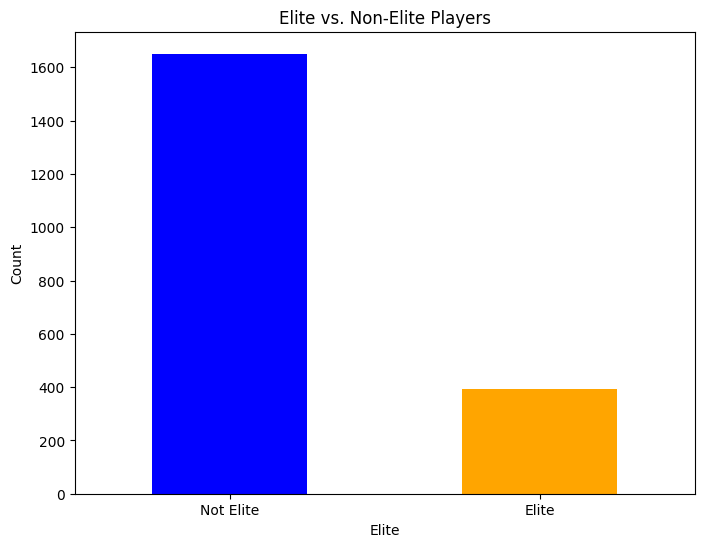

In [161]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
golfdata['Elite'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Elite vs. Non-Elite Players')
plt.xlabel('Elite')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Elite', 'Elite'], rotation=0)
plt.show()

In [162]:
# Group by 'Year' and calculate mean for each numeric column
grouped_data = golfdata.groupby('Year').mean()

grouped_data

<ipython-input-162-bd542d77c44b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = golfdata.groupby('Year').mean()


,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,MONEY,Elite,Quartile_Q1,Quartile_Q2,Quartile_Q3,Quartile_Q4
Year,,,,,,,,,,,,,,,,,
2007,82.107692,70.936354,289.066154,63.473590,64.550564,0.023205,0.135785,0.158913,5236.394872,2.630769,0.235897,1.305958e+06,0.205128,0.256410,0.282051,0.220513,0.241026
2008,82.515464,70.899655,287.501031,63.438711,64.814948,0.020964,0.107335,0.128845,7741.164948,2.737113,0.226804,1.298769e+06,0.216495,0.324742,0.278351,0.216495,0.180412
2009,78.917582,70.864588,288.048901,63.546758,65.481044,0.017148,0.137863,0.155044,683.686813,2.631868,0.230769,1.326585e+06,0.175824,0.335165,0.236264,0.230769,0.197802
2010,79.518519,70.979656,287.639683,63.385079,66.969788,0.008667,0.103894,0.112683,662.661376,2.619048,0.211640,1.274941e+06,0.179894,0.343915,0.253968,0.243386,0.158730
2011,78.043243,70.863659,291.116757,61.776216,65.540162,0.037730,0.111524,0.149173,685.318919,2.594595,0.232432,1.345127e+06,0.162162,0.194595,0.210811,0.281081,0.313514
2012,77.730159,70.882577,290.046561,61.129153,64.942116,0.018402,0.133709,0.152201,677.582011,2.703704,0.243386,1.373642e+06,0.201058,0.185185,0.296296,0.264550,0.253968
2013,72.284916,70.919318,287.843575,61.313184,64.982682,0.034190,0.099950,0.134190,706.698324,2.558659,0.217877,1.354520e+06,0.184358,0.318436,0.234637,0.262570,0.184358
2014,79.653409,70.835375,289.920455,61.576761,64.975114,0.013795,0.184619,0.198381,801.528409,2.750000,0.255682,1.577034e+06,0.198864,0.232955,0.255682,0.244318,0.267045
2015,81.655738,70.949525,290.206011,61.892350,66.288907,0.011503,0.140306,0.151732,705.420765,2.775956,0.240437,1.556128e+06,0.191257,0.240437,0.234973,0.267760,0.256831


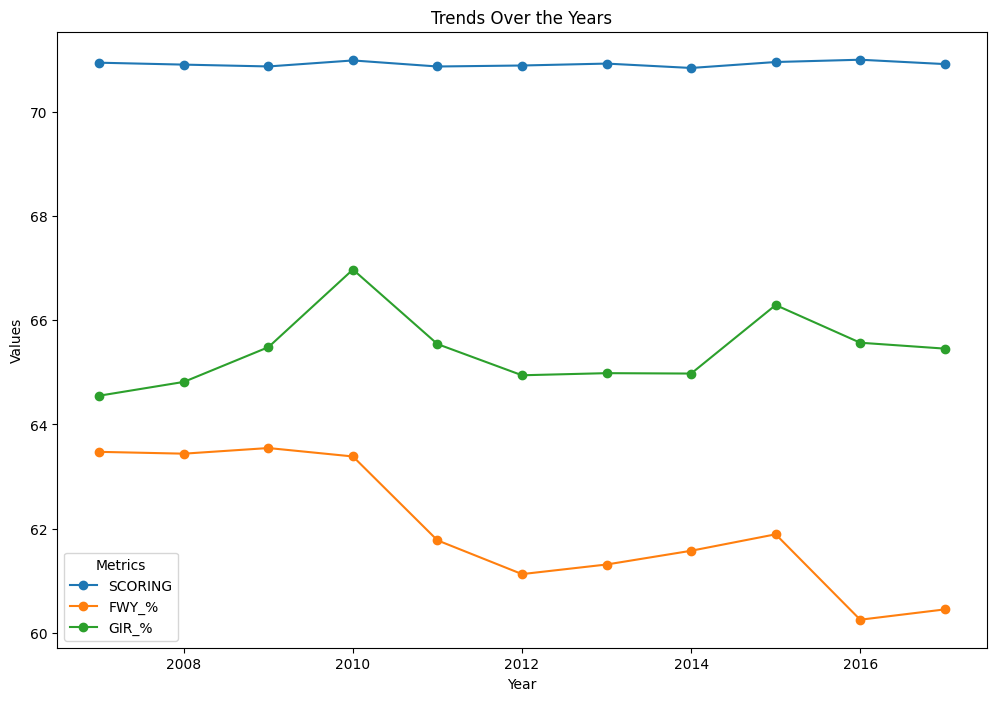

In [163]:
# Select the relevant columns
columns_to_plot = ['SCORING', 'FWY_%', 'GIR_%']
subset_data = grouped_data[columns_to_plot]

# Plot the Line Grahps
subset_data.plot(marker='o', figsize=(12, 8))
plt.title('Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(title='Metrics')
plt.show()

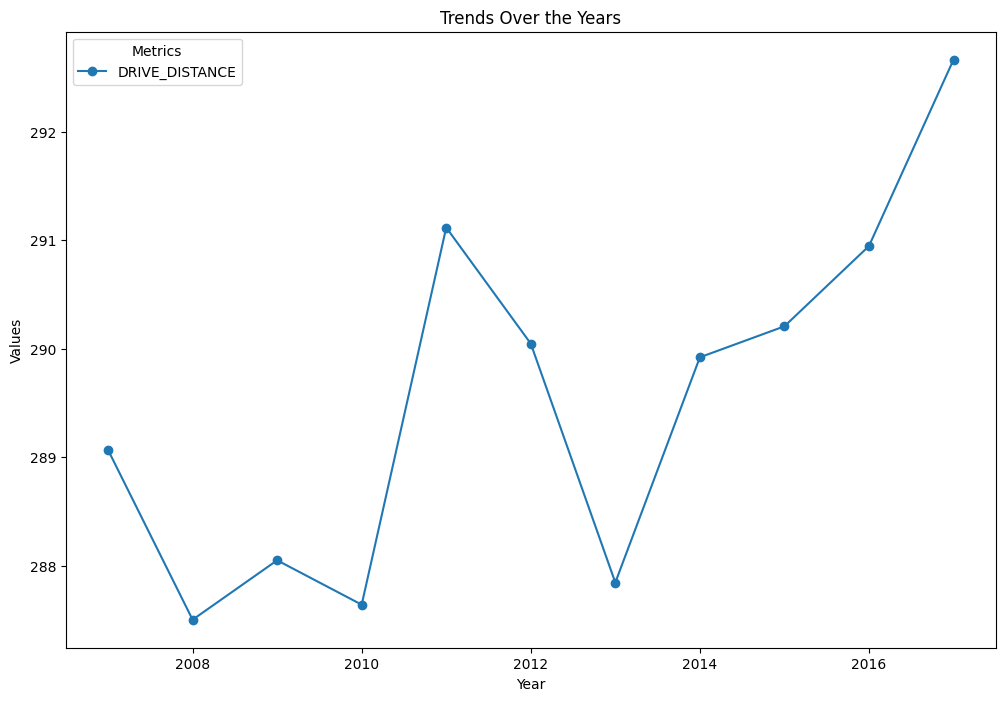

In [164]:
columns_to_plot = ['DRIVE_DISTANCE']
subset_data = grouped_data[columns_to_plot]

# Plot the Line Grahps
subset_data.plot(marker='o', figsize=(12, 8))
plt.title('Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(title='Metrics')
plt.show()

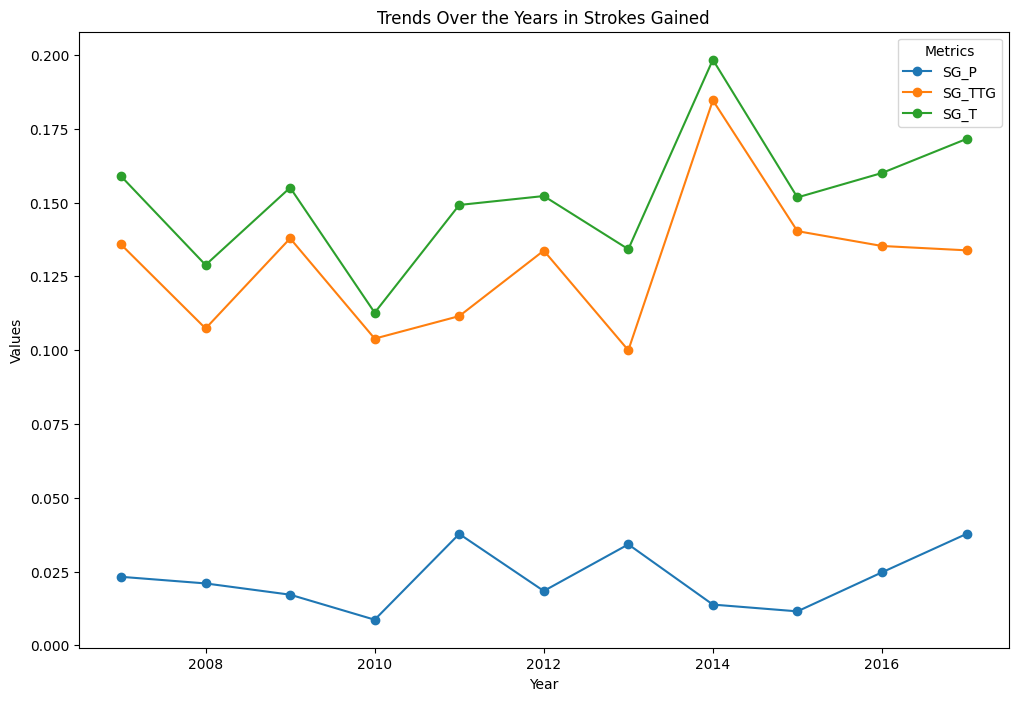

In [165]:
columns_to_plot = ['SG_P', 'SG_TTG', 'SG_T']
subset_data = grouped_data[columns_to_plot]

subset_data.plot(marker='o', figsize=(12, 8))
plt.title('Trends Over the Years in Strokes Gained')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(title='Metrics')
plt.show()

In [166]:
grouped_data.describe()

,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,MONEY,Elite,Quartile_Q1,Quartile_Q2,Quartile_Q3,Quartile_Q4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000
mean,79.311142,70.912185,289.545377,62.021652,65.414998,0.022551,0.129461,0.152065,1743.102318,2.675088,0.234420,1.420997e+06,0.192096,0.254326,0.249155,0.248817,0.247701
std,2.805571,0.049750,1.678119,1.243445,0.702625,0.010208,0.023827,0.022498,2412.797630,0.071529,0.012969,1.371753e+05,0.015716,0.065537,0.030246,0.020543,0.066141
min,72.284916,70.835375,287.501031,60.254293,64.550564,0.008667,0.099950,0.112683,577.723404,2.558659,0.211640,1.274941e+06,0.162162,0.175532,0.196809,0.216495,0.158730
25%,78.480413,70.873582,287.946238,61.221169,64.958615,0.015472,0.109430,0.141681,680.634412,2.624908,0.228787,1.316271e+06,0.182126,0.192406,0.234805,0.237078,0.191080
50%,79.554348,70.909840,289.920455,61.776216,65.453298,0.020964,0.133809,0.152201,695.945652,2.690217,0.233696,1.354520e+06,0.191489,0.240437,0.253968,0.244681,0.253968
75%,81.048614,70.942939,290.576103,63.411895,65.553260,0.029454,0.136824,0.159459,754.113367,2.735578,0.241912,1.560453e+06,0.203093,0.321589,0.269610,0.263560,0.277544
max,82.515464,70.993489,292.663830,63.546758,66.969788,0.037739,0.184619,0.198381,7741.164948,2.775956,0.255682,1.653487e+06,0.216495,0.343915,0.296296,0.281081,0.382979


In [167]:
golfdata.describe()

,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,Quartile_Q1,Quartile_Q2,Quartile_Q3,Quartile_Q4
count,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2.044000e+03,2044.000000,2044.000000,2044.000000,2044.000000
mean,79.355186,70.912630,289.540068,62.036404,65.412480,0.022556,0.129178,0.151788,1790.963796,2.675147,0.234344,2011.949119,1.419303e+06,0.254403,0.249511,0.248532,0.247554
std,14.604295,0.681575,8.710074,5.209013,2.650798,0.351150,0.621524,0.675791,3833.522276,2.411051,0.593136,3.185158,1.325270e+06,0.435632,0.432836,0.432268,0.431697
min,45.000000,67.794000,259.000000,41.860000,54.230000,-1.475000,-3.340000,-3.209000,6.000000,0.000000,0.000000,2007.000000,4.546000e+04,0.000000,0.000000,0.000000,0.000000
25%,69.000000,70.490500,283.600000,58.510000,63.640000,-0.194000,-0.259500,-0.262500,360.000000,1.000000,0.000000,2009.000000,5.564188e+05,0.000000,0.000000,0.000000,0.000000
50%,80.000000,70.899000,289.300000,62.040000,65.560000,0.036000,0.140500,0.157500,659.000000,2.000000,0.000000,2012.000000,1.016720e+06,0.000000,0.000000,0.000000,0.000000
75%,90.000000,71.338750,295.200000,65.605000,67.122500,0.261000,0.528000,0.564250,1272.000000,4.000000,0.000000,2015.000000,1.809302e+06,1.000000,0.000000,0.000000,0.000000
max,124.000000,74.262000,318.400000,80.420000,73.520000,1.130000,2.380000,3.189000,53607.000000,15.000000,7.000000,2017.000000,1.203046e+07,1.000000,1.000000,1.000000,1.000000


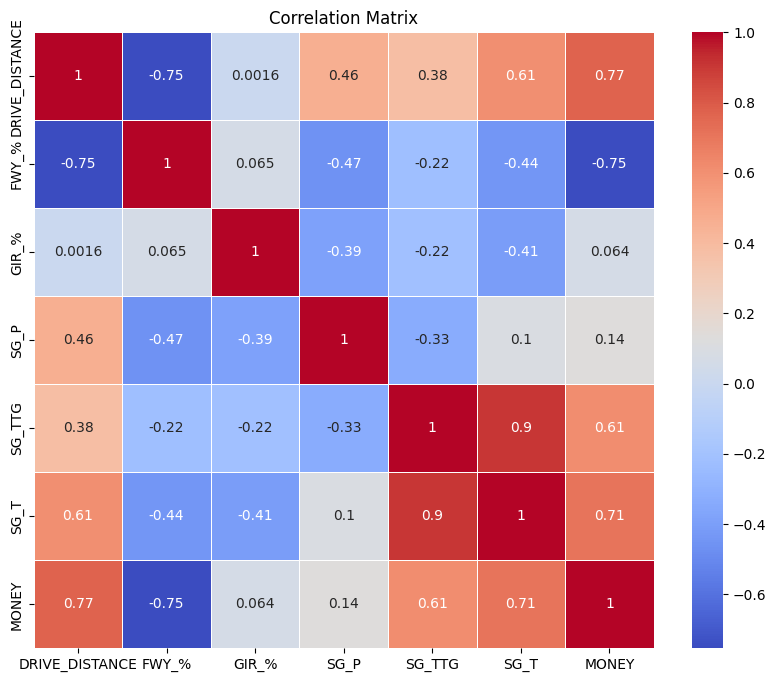

In [168]:
# Select relevant columns for the correlation matrix
selected_columns = ['DRIVE_DISTANCE','FWY_%','GIR_%','SG_P','SG_TTG','SG_T','MONEY']

# Create a DataFrame with selected columns
selected_data = grouped_data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [169]:
golfdata.corr()

<ipython-input-169-de2810690bf0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  golfdata.corr()


,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,Elite,Quartile_Q1,Quartile_Q2,Quartile_Q3,Quartile_Q4
ROUNDS,1.000000,-0.288129,0.037073,0.105311,0.229135,0.170641,0.231078,0.301169,0.161791,0.300828,0.067178,-0.036261,0.243685,0.194576,-0.067604,0.046913,0.020513,0.000643
SCORING,-0.288129,1.000000,-0.202776,-0.122503,-0.394077,-0.376789,-0.830916,-0.959868,-0.343378,-0.769608,-0.427935,0.010832,-0.755223,-0.597323,0.088935,0.113689,-0.022739,-0.180965
DRIVE_DISTANCE,0.037073,-0.202776,1.000000,-0.592994,0.265786,-0.164784,0.330808,0.218549,0.021125,0.228287,0.193432,0.131482,0.274851,0.163887,-0.720006,-0.194313,0.175433,0.745730
FWY_%,0.105311,-0.122503,-0.592994,1.000000,0.302955,-0.059205,0.159499,0.115822,0.048234,0.028743,-0.062438,-0.204948,-0.027390,0.007114,0.455945,0.087365,-0.122072,-0.425463
GIR_%,0.229135,-0.394077,0.265786,0.302955,1.000000,-0.266824,0.596454,0.409802,-0.002868,0.282380,0.103625,0.061232,0.259198,0.202437,-0.212386,-0.040065,0.081077,0.173308
SG_P,0.170641,-0.376789,-0.164784,-0.059205,-0.266824,1.000000,-0.121032,0.408365,0.107446,0.308069,0.169833,0.006473,0.283605,0.239809,0.146030,0.011002,-0.056530,-0.101787
SG_TTG,0.231078,-0.830916,0.330808,0.159499,0.596454,-0.121032,1.000000,0.856672,0.276433,0.662652,0.366939,0.011826,0.663322,0.513132,-0.188415,-0.135077,0.063565,0.261916
SG_T,0.301169,-0.959868,0.218549,0.115822,0.409802,0.408365,0.856672,1.000000,0.310003,0.769476,0.425788,0.014140,0.757335,0.596515,-0.097294,-0.118591,0.029129,0.187917
POINTS,0.161791,-0.343378,0.021125,0.048234,-0.002868,0.107446,0.276433,0.310003,1.000000,0.334764,0.290491,-0.393884,0.334696,0.303131,-0.016698,-0.021496,0.003315,0.035083
TOP 10,0.300828,-0.769608,0.228287,0.028743,0.282380,0.308069,0.662652,0.769476,0.334764,1.000000,0.514983,0.011614,0.869734,0.806361,-0.108153,-0.093959,-0.005154,0.208506


<Axes: xlabel='Year', ylabel='DRIVE_DISTANCE'>

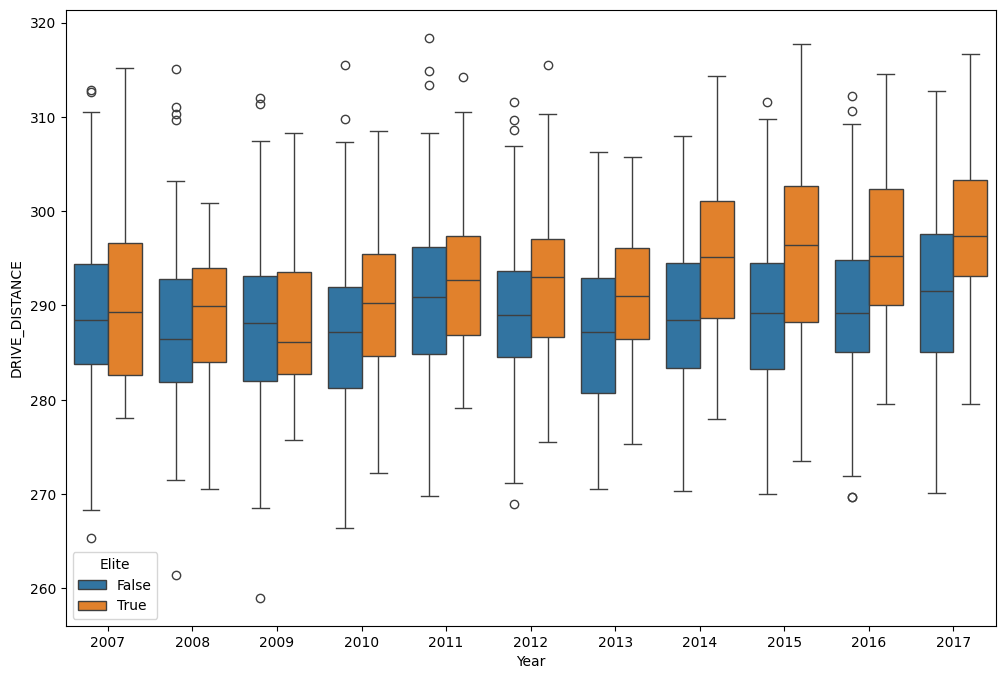

In [170]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='DRIVE_DISTANCE', hue='Elite', data=golfdata)

#Training and testing of machine learning model

We'll analyze our dataset to find out what makes a golfer elite using logistic regression. We'll check how accurate our model is and its performance with cross-validation scores. Then, we'll use the best score to see how well the decision tree classifier works. This helps us understand what separates elite golfers from the rest.

In [171]:
golfdata

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,...,1ST,Year,MONEY,COUNTRY,Elite,Drive_Distance_Quartile,Quartile_Q1,Quartile_Q2,Quartile_Q3,Quartile_Q4
0,Aaron Baddeley,83,70.088,291.9,60.00,60.35,0.629,0.435,1.064,17703,...,1,2007,3441119,AUS,True,Q3,0,0,1,0
1,Adam Scott,69,70.008,300.9,59.17,65.44,0.129,1.105,1.234,15630,...,1,2007,3413185,AUS,True,Q4,0,0,0,1
2,Alex Cejka,80,70.437,288.9,68.08,69.44,-0.479,1.207,0.728,2400,...,0,2007,868303,GER,False,Q2,0,1,0,0
3,Anders Hansen,55,70.856,280.7,66.95,62.85,-0.176,0.087,-0.089,1989,...,0,2007,461216,DEN,False,Q1,1,0,0,0
4,Andrew Buckle,77,71.443,294.7,58.14,62.52,0.161,-0.426,-0.265,1875,...,0,2007,513630,AUS,False,Q3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,Whee Kim,74,70.964,289.4,54.32,62.09,0.456,-0.688,-0.232,583,...,0,2017,1125368,KOR,False,Q3,0,0,1,0
2040,William McGirt,89,71.151,284.8,70.06,67.23,-0.018,-0.049,-0.067,621,...,0,2017,1225005,USA,False,Q2,0,1,0,0
2041,Xander Schauffele,96,70.163,306.3,57.68,67.74,0.342,0.382,0.724,2151,...,2,2017,4312674,USA,False,Q4,0,0,0,1
2042,Zac Blair,105,71.007,272.7,69.70,64.70,0.035,-0.078,-0.044,364,...,0,2017,788352,USA,False,Q1,1,0,0,0


In [194]:
x = golfdata[['SCORING','DRIVE_DISTANCE','FWY_%','GIR_%','SG_P','SG_TTG','SG_T']]
y = golfdata['Elite']

# Fitting a logistic regression model with multiple predictors
model_multiple = LogisticRegression(max_iter=1000)
model_multiple.fit(x, y)

# Adding a constant term to the predictor variables
x_sm = sm.add_constant(x)

# Fitting the logistic regression model using statsmodels
model_multiple_sm = sm.Logit(y, x_sm).fit()

# Printing the detailed output
print(model_multiple_sm.summary())

# Splitting the data into training and testing sets
#test size = 25%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Fitting the logistic regression model on the training set
#use the training set to generate the regression model
model_multiple.fit(X_train, y_train)

# Predicting probabilities on the testing set
#take the testing dataset and predict the probabiiities
y_pred_prob = model_multiple.predict_proba(X_test)[:, 1]

# Setting a threshold for classification
threshold = 0.9

# Making binary predictions based on the threshold
#This indicates that any prediction probability less than 0.9, will be ‘assigned’ to class 0.
#And anything greater than or equal to 0.9 will be ‘assigned’ to class 1.
y_pred = (y_pred_prob > threshold).astype(int)

# Evaluating the model accuracy on the testing set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy on the testing set: {accuracy:.3f}")

from sklearn.model_selection import cross_val_score

# Calculate cross-validation score for k-fold of 5 for the multiple logistic regression model
cv_5_scores = cross_val_score(model_multiple, x, y, cv=5)

# Print the average cross-validation score
print(f"Average 5 Fold Cross-Validation Score: {np.mean(cv_5_scores):.3f}")

# Calculate cross-validation score for k-fold of 10 for the multiple logistic regression model
cv_10_scores = cross_val_score(model_multiple, x, y, cv=10)

# Print the average cross-validation score
print(f"Average 10 Fold Cross-Validation Score: {np.mean(cv_10_scores):.3f}")

# Accessing the AIC and BIC values for the logistic output
aic = model_multiple_sm.aic
bic = model_multiple_sm.bic

print(f"AIC: {aic}")
print(f"BIC: {bic}")

# Leave-One-Out Cross-Validation (LOOCV)
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(model_multiple, x, y, cv=loo)

# Print the LOOCV score
print(f"LOOCV Score: {np.mean(scores):.3f}")

Optimization terminated successfully.
         Current function value: 0.236361
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Elite   No. Observations:                 2044
Model:                          Logit   Df Residuals:                     2036
Method:                           MLE   Df Model:                            7
Date:                Thu, 14 Mar 2024   Pseudo R-squ.:                  0.5171
Time:                        23:49:02   Log-Likelihood:                -483.12
converged:                       True   LL-Null:                       -1000.5
Covariance Type:            nonrobust   LLR p-value:                3.597e-219
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            156.5825     31.498      4.971      0.000      94.848     218.317
SCORING          

In [195]:
x = golfdata[['DRIVE_DISTANCE','FWY_%','GIR_%','SG_P','SG_TTG','SG_T']]
y = golfdata['Elite']

# Fitting a logistic regression model with multiple predictors
model_multiple = LogisticRegression(max_iter=1000)
model_multiple.fit(x, y)

# Adding a constant term to the predictor variables
x_sm = sm.add_constant(x)

# Fitting the logistic regression model using statsmodels
model_multiple_sm = sm.Logit(y, x_sm).fit()

# Printing the detailed output
print(model_multiple_sm.summary())

# Splitting the data into training and testing sets
#test size = 25%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Fitting the logistic regression model on the training set
model_multiple.fit(X_train, y_train)

# Predicting probabilities on the testing set
y_pred_prob = model_multiple.predict_proba(X_test)[:, 1]

# Setting a threshold for classification
threshold = 0.9

# Making binary predictions based on the threshold
y_pred = (y_pred_prob > threshold).astype(int)

# Evaluating the model accuracy on the testing set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy on the testing set: {accuracy:.3f}")

from sklearn.model_selection import cross_val_score

# Calculate cross-validation score for k-fold of 5 for the multiple logistic regression model
cv_5_scores = cross_val_score(model_multiple, x, y, cv=5)

# Print the average cross-validation score
print(f"Average 5 Fold Cross-Validation Score: {np.mean(cv_5_scores):.3f}")

# Calculate cross-validation score for k-fold of 10 for the multiple logistic regression model
cv_10_scores = cross_val_score(model_multiple, x, y, cv=10)

# Print the average cross-validation score
print(f"Average 10 Fold Cross-Validation Score: {np.mean(cv_10_scores):.3f}")

# Accessing the AIC and BIC values for the logistic output
aic = model_multiple_sm.aic
bic = model_multiple_sm.bic

print(f"AIC: {aic}")
print(f"BIC: {bic}")

# Leave-One-Out Cross-Validation (LOOCV)
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(model_multiple, x, y, cv=loo)

# Print the LOOCV score
print(f"LOOCV Score: {np.mean(scores):.3f}")

Optimization terminated successfully.
         Current function value: 0.242878
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Elite   No. Observations:                 2044
Model:                          Logit   Df Residuals:                     2037
Method:                           MLE   Df Model:                            6
Date:                Thu, 14 Mar 2024   Pseudo R-squ.:                  0.5038
Time:                        23:51:18   Log-Likelihood:                -496.44
converged:                       True   LL-Null:                       -1000.5
Covariance Type:            nonrobust   LLR p-value:                1.520e-214
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7552      5.422      0.139      0.889      -9.873      11.383
DRIVE_DISTANCE   

In [175]:
#convert true and flase for elite into 1 and 0's for classification
golfdata["Elite"] = golfdata["Elite"].map({True: 1, False: 0})

golfdata

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,...,1ST,Year,MONEY,COUNTRY,Elite,Drive_Distance_Quartile,Quartile_Q1,Quartile_Q2,Quartile_Q3,Quartile_Q4
0,Aaron Baddeley,83,70.088,291.9,60.00,60.35,0.629,0.435,1.064,17703,...,1,2007,3441119,AUS,1,Q3,0,0,1,0
1,Adam Scott,69,70.008,300.9,59.17,65.44,0.129,1.105,1.234,15630,...,1,2007,3413185,AUS,1,Q4,0,0,0,1
2,Alex Cejka,80,70.437,288.9,68.08,69.44,-0.479,1.207,0.728,2400,...,0,2007,868303,GER,0,Q2,0,1,0,0
3,Anders Hansen,55,70.856,280.7,66.95,62.85,-0.176,0.087,-0.089,1989,...,0,2007,461216,DEN,0,Q1,1,0,0,0
4,Andrew Buckle,77,71.443,294.7,58.14,62.52,0.161,-0.426,-0.265,1875,...,0,2007,513630,AUS,0,Q3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,Whee Kim,74,70.964,289.4,54.32,62.09,0.456,-0.688,-0.232,583,...,0,2017,1125368,KOR,0,Q3,0,0,1,0
2040,William McGirt,89,71.151,284.8,70.06,67.23,-0.018,-0.049,-0.067,621,...,0,2017,1225005,USA,0,Q2,0,1,0,0
2041,Xander Schauffele,96,70.163,306.3,57.68,67.74,0.342,0.382,0.724,2151,...,2,2017,4312674,USA,0,Q4,0,0,0,1
2042,Zac Blair,105,71.007,272.7,69.70,64.70,0.035,-0.078,-0.044,364,...,0,2017,788352,USA,0,Q1,1,0,0,0


In [176]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [197]:
# Splitting the dataset into training and testing sets
X = golfdata[['SCORING','DRIVE_DISTANCE','FWY_%','GIR_%','SG_P','SG_TTG','SG_T']]
y = golfdata['Elite']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [198]:
# Training the decision tree classifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [199]:
# Predicting test set results
y_pred = classifier.predict(X_test)

In [200]:

# Evaluating the classifier
# print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 0.823960880195599


In [201]:
# Tuning the model with GridSearchCV
param_grid = {'max_depth': np.arange(3, 10), 'criterion': ['gini','entropy']}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv = 10)
grid.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9])})

In [202]:

# Best parameters and best score
print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')


Best parameters: {'criterion': 'entropy', 'max_depth': 3}
Best score: 0.8917364955858147


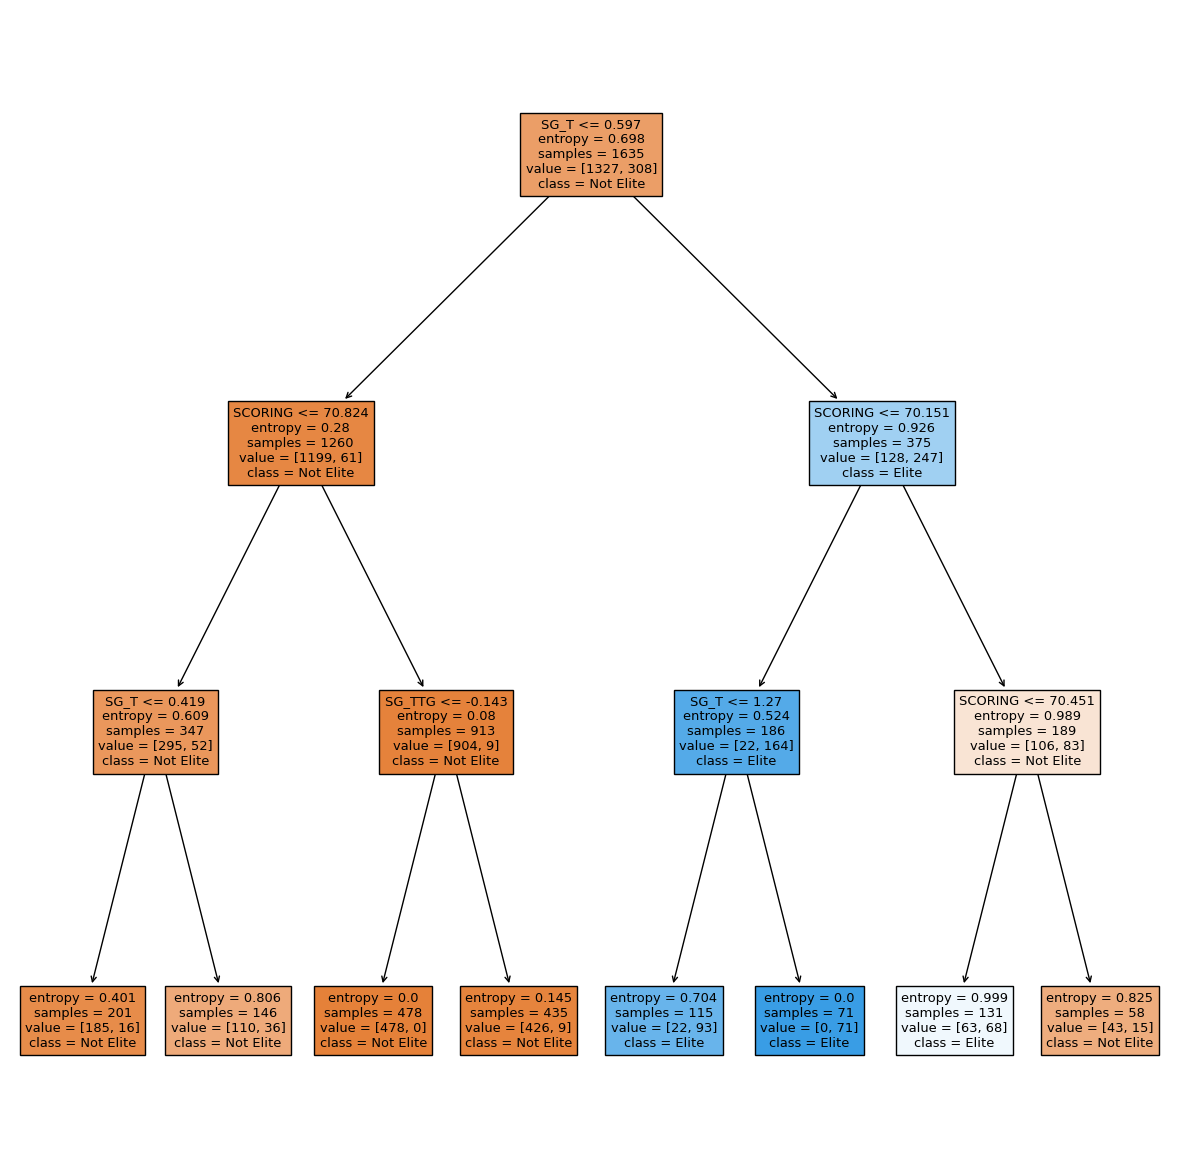

In [203]:
# Visualizing the decision tree
plt.figure(figsize=(15,15))
plot_tree(grid.best_estimator_, filled=True, feature_names=X.columns, class_names=['Not Elite', 'Elite'])
plt.show()

In [204]:
# Splitting the dataset into training and testing sets
X = golfdata[['DRIVE_DISTANCE','FWY_%','GIR_%','SG_P','SG_TTG']]
y = golfdata['Elite']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [205]:
# Training the decision tree classifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [206]:
# Predicting test set results
y_pred = classifier.predict(X_test)

In [207]:

# Evaluating the classifier
# print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 0.8533007334963325


In [208]:
# Tuning the model with GridSearchCV
param_grid = {'max_depth': np.arange(3, 10), 'criterion': ['gini','entropy']}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv = 10)
grid.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9])})

In [209]:

# Best parameters and best score
print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')


Best parameters: {'criterion': 'entropy', 'max_depth': 4}
Best score: 0.8801137213826127


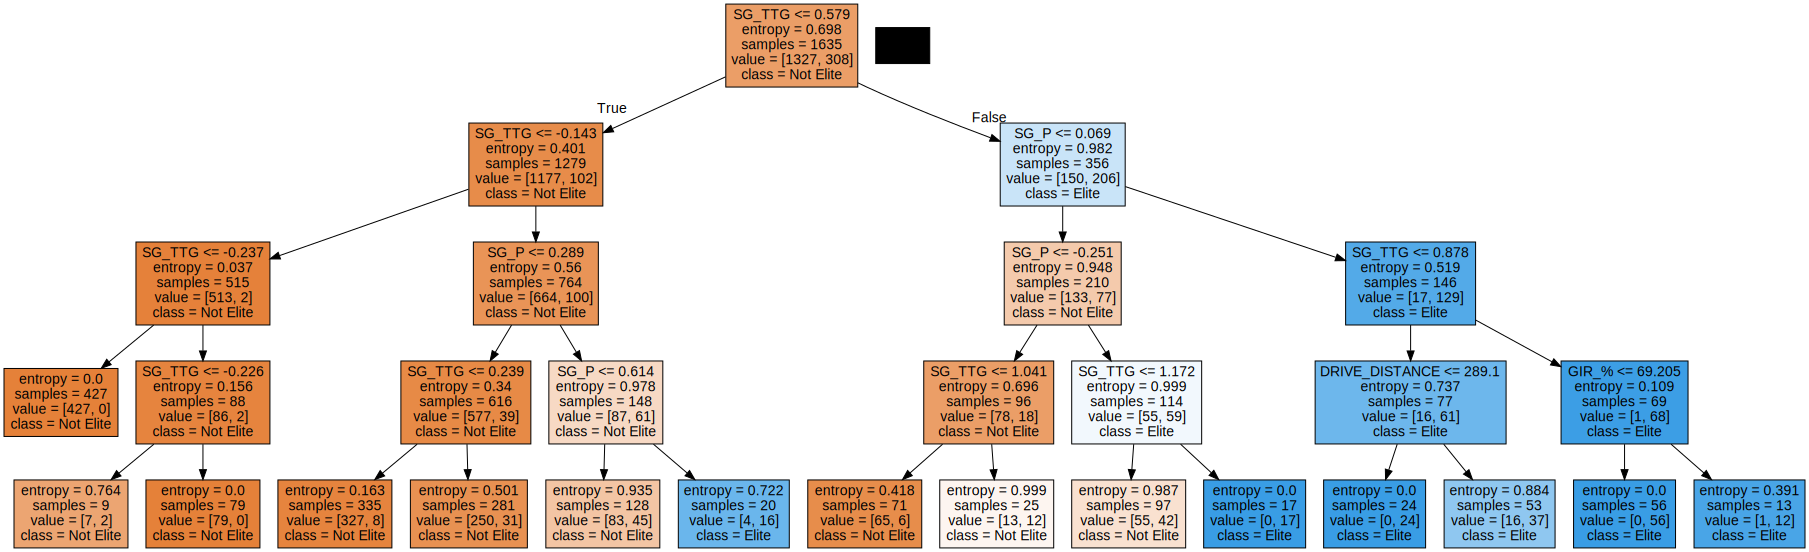

In [210]:
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from sklearn.tree import export_graphviz
import pydotplus

dot_data = tree.export_graphviz(grid.best_estimator_, out_file=None, filled=True, feature_names=X.columns,class_names=['Not Elite', 'Elite'])

graph = pydotplus.graph_from_dot_data(dot_data)
svg_bytes = graph.create_svg()

# Display the SVG interactive graph
SVG(svg_bytes)

# Conclusions

Based on the logistic regression analysis conducted on our dataset, we have identified several factors that contribute to the classification of a golfer as "Elite." The coefficients obtained from the analysis indicate the strength and direction of the association between each predictor variable and the likelihood of being classified as elite.

Among the variables examined, scoring appears to be a significant predictor, as evidenced by its negative coefficient. This suggests that lower scoring is associated with a higher likelihood of being classified as elite. This conclusion is relatively straightforward as lower scores translate to wins on the PGATour.

When re-running the logistic regression without the ‘Scoring’ feature, the regression results suggests that none of the predictor variables examined have a statistically significant impact on classifying golfers as "Elite." The model does not provide strong evidence to support the influence of these variables on elite golfer classification.

The decision tree classifier, incorporating all performance variables, achieves an impressive best score of 89.17% when using the entropy criteria. Delving into the tree's structure, we discern the pivotal roles of driving distance and green regulation percentage in distinguishing truly elite golfers, especially when their strokes tee-to-green surpass a specific threshold.

However, upon excluding Scoring and Strokes Gained Total, the decision tree classifier yields a distinct set of variables crucial for identifying elite golfers within the PGA Tour. Notably, strokes gained putting and strokes gained tee to green emerge as key criteria for differentiating elite golfers, underscoring their significance in the classification process.

